In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_eth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Численные методы/coin_Ethereum.csv', sep=',',skiprows=1, index_col=0,names=['Sno', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close','Volume','Marketcap'])

df_eth.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Sno,,,,,,,,,
1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [ ]:
 df_mon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Численные методы/coin_Monero.csv', sep=',',skiprows=1, index_col=0,names=['Sno', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close','Volume','Marketcap'])
df_mon = df_mon.drop(df_mon[df_mon.index < 443].index)
df_mon.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Sno,,,,,,,,,
443,Monero,XMR,2015-08-08 23:59:59,0.744513,0.675775,0.742898,0.676046,58680.300781,5.976609e+06
444,Monero,XMR,2015-08-09 23:59:59,0.696012,0.633000,0.676069,0.674739,101826.000000,5.973861e+06
445,Monero,XMR,2015-08-10 23:59:59,0.698476,0.656262,0.686737,0.656576,33306.898438,5.821546e+06
446,Monero,XMR,2015-08-11 23:59:59,0.657478,0.599139,0.656747,0.603582,69220.500000,5.359598e+06
447,Monero,XMR,2015-08-12 23:59:59,0.651037,0.602168,0.603783,0.622923,51924.898438,5.539465e+06


In [ ]:
df_eth.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
df_mon.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
X = []
X.append(np.array(df_eth['Close']))
X.append(np.array(df_mon['Close'][-2031:]))
X = np.array(X)
X[0]

array([7.53324986e-01, 7.01897025e-01, 7.08447993e-01, ...,
       1.47570374e+03, 1.44603365e+03, 1.45997312e+03])

In [ ]:
r = np.corrcoef(X[0], X[1])[0][1] 
r

0.8224820011364127

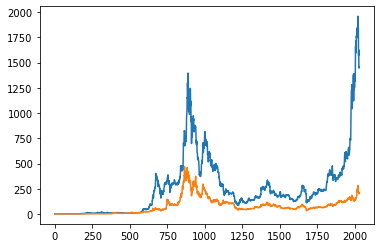

In [ ]:
plt.plot(X[0])
plt.plot(X[1])

In [ ]:
df_mon_test=df_mon.copy(deep=True)
df_eth_test=df_eth.copy(deep=True)

In [ ]:
df_mon_test = df_mon_test.drop(df_mon_test[df_mon_test.index < 2125].index)
df_eth_test = df_eth_test.drop(df_eth_test[df_eth_test.index < 1683].index)

In [ ]:
df_mon['Close'][2125]-df_mon['Close'][2080]

-38.2706087926

In [ ]:
df_eth['Close'][1683]-df_eth['Close'][1638]

-69.554299227

In [ ]:
data_for_train=df_eth.copy(deep=True)
data_for_train=data_for_train.drop(data_for_train[data_for_train.index >1682].index)

In [ ]:
data_for_train

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Sno,,,,,,,,,
1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...
1678,Ethereum,ETH,2020-03-11 23:59:59,202.954304,184.362158,200.768030,194.868528,1.698479e+10,2.144668e+10
1679,Ethereum,ETH,2020-03-12 23:59:59,195.147941,111.210712,194.738917,112.347124,2.213474e+10,1.236614e+10
1680,Ethereum,ETH,2020-03-13 23:59:59,137.429536,95.184301,112.689995,133.201807,2.786462e+10,1.466342e+10


In [ ]:
features = data_for_train[["Open","High","Low","Close"]].values
print(features.shape)

price_variation = (1- (features[:,0]/features[:,3]))*100
highs = (features[:,1]/np.maximum(features[:,0],features[:,3]) -1)*100
lows = (features[:,2]/np.minimum(features[:,0],features[:,3]) -1)*100

X_train = np.array([price_variation , highs, lows]).transpose()
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

print(X_train[:2])

Y_train = np.array((np.sign((features[2:,3]/features[:-2,3]-1))+1)/2)
print(Y_train[:10])

(1682, 4)
[[[-2.70857215e+02]
  [ 1.80757968e-01]
  [-5.12394633e+00]]

 [[-6.03929490e-01]
  [ 2.45949775e+01]
  [-1.03585058e+01]]]
[0. 1. 1. 1. 1. 0. 0. 0. 0. 1.]


In [ ]:
X_train

array([[[-2.70857215e+02],
        [ 1.80757968e-01],
        [-5.12394633e+00]],

       [[-6.03929490e-01],
        [ 2.45949775e+01],
        [-1.03585058e+01]],

       [[-7.82135972e-01],
        [ 2.22201853e+00],
        [-1.01492245e+01]],

       ...,

       [[ 1.53990497e+01],
        [ 3.17392765e+00],
        [-1.55343820e+01]],

       [[-8.33410088e+00],
        [ 6.75162765e-01],
        [-7.23037847e-01]],

       [[ 1.57189553e+00],
        [ 5.61265195e+00],
        [-1.12978348e+00]]])

In [ ]:
Y_train

array([0., 1., 1., ..., 0., 1., 0.])

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape = (None,1), return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
model.fit(X_train[:-2],Y_train, batch_size=512,epochs=500,validation_split=0.05)

Epoch 1/500
4/4 [==============================] - 6s 420ms/step - loss: 0.2501 - val_loss: 0.2531
Epoch 2/500
4/4 [==============================] - 0s 63ms/step - loss: 0.2497 - val_loss: 0.2518
Epoch 3/500
4/4 [==============================] - 0s 63ms/step - loss: 0.2492 - val_loss: 0.2490
Epoch 4/500
4/4 [==============================] - 0s 64ms/step - loss: 0.2488 - val_loss: 0.2510
Epoch 5/500
4/4 [==============================] - 0s 66ms/step - loss: 0.2492 - val_loss: 0.2538
Epoch 6/500
4/4 [==============================] - 0s 62ms/step - loss: 0.2492 - val_loss: 0.2529
Epoch 7/500
4/4 [==============================] - 0s 62ms/step - loss: 0.2493 - val_loss: 0.2551
Epoch 8/500
4/4 [==============================] - 0s 63ms/step - loss: 0.2488 - val_loss: 0.2549
Epoch 9/500
4/4 [==============================] - 0s 65ms/step - loss: 0.2490 - val_loss: 0.2548
Epoch 10/500
4/4 [==============================] - 0s 63ms/step - loss: 0.2488 - val_loss: 0.2532
Epoch 11/500
4/4 [

In [ ]:
data_for_test=df_mon.copy(deep=True)
data_for_test=data_for_test.drop(data_for_test[data_for_test.index >2124].index)

In [ ]:
data_for_test

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Sno,,,,,,,,,
443,Monero,XMR,2015-08-08 23:59:59,0.744513,0.675775,0.742898,0.676046,5.868030e+04,5.976609e+06
444,Monero,XMR,2015-08-09 23:59:59,0.696012,0.633000,0.676069,0.674739,1.018260e+05,5.973861e+06
445,Monero,XMR,2015-08-10 23:59:59,0.698476,0.656262,0.686737,0.656576,3.330690e+04,5.821546e+06
446,Monero,XMR,2015-08-11 23:59:59,0.657478,0.599139,0.656747,0.603582,6.922050e+04,5.359598e+06
447,Monero,XMR,2015-08-12 23:59:59,0.651037,0.602168,0.603783,0.622923,5.192490e+04,5.539465e+06
...,...,...,...,...,...,...,...,...,...
2120,Monero,XMR,2020-03-11 23:59:59,55.838465,51.443234,54.952122,54.112373,1.082971e+08,9.458286e+08
2121,Monero,XMR,2020-03-12 23:59:59,54.181028,32.927797,54.092969,33.010324,1.519853e+08,5.770303e+08
2122,Monero,XMR,2020-03-13 23:59:59,39.940888,26.703887,33.084613,36.835372,1.993410e+08,6.439413e+08


In [ ]:
features_test = data_for_test[["Open","High","Low","Close"]].values
print(features_test.shape)

price_variation = (1- (features_test[:,0]/features_test[:,3]))*100
highs = (features_test[:,1]/np.maximum(features_test[:,0],features_test[:,3]) -1)*100
lows = (features_test[:,2]/np.minimum(features_test[:,0],features_test[:,3]) -1)*100

X_test = np.array([price_variation , highs, lows]).transpose()
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Y_test = np.array((np.sign(features_test[2:,3]/features_test[:-2,3]-1)+1)/2)
print(Y_test[:3])

(1682, 4)
[0. 0. 0.]


In [ ]:
X_test[:-2]

array([[[-9.88867210e+00],
        [ 2.17390258e-01],
        [-4.00893303e-02]],

       [[-1.97115927e-01],
        [ 2.94984658e+00],
        [-6.18594549e+00]],

       [[-4.59368362e+00],
        [ 1.70939029e+00],
        [-4.78234476e-02]],

       ...,

       [[-1.55186006e+00],
        [ 1.61293794e+00],
        [-4.93258677e+00]],

       [[-6.38668224e+01],
        [ 1.62793237e-01],
        [-2.50003135e-01]],

       [[ 1.01824929e+01],
        [ 8.43079855e+00],
        [-1.92860835e+01]]])

In [ ]:
pred = model.predict(X_test)

predicted = (np.sign(pred-0.45)+1)/2*20

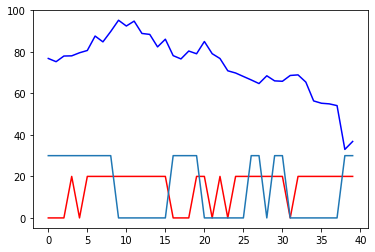

In [ ]:
start =1640
stop = 1680
plt.plot(predicted[start:stop],'r')
plt.plot(features_test[start:stop,3],'b')
plt.plot(Y_test[start:stop]*30)
plt.show()

Торговая стратегия

In [ ]:
def test(data_for_test):
  features_test = data_for_test[["Open","High","Low","Close"]].values

  price_variation = (1- (features_test[:,0]/features_test[:,3]))*100
  highs = (features_test[:,1]/np.maximum(features_test[:,0],features_test[:,3]) -1)*100
  lows = (features_test[:,2]/np.minimum(features_test[:,0],features_test[:,3]) -1)*100

  X_test = np.array([price_variation , highs, lows]).transpose()
  X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

  pred = model.predict(X_test)
  predicted = (np.sign(pred-0.45)+1)/2*20
  return predicted

In [ ]:
n=df_mon_test.shape[0]
a=[]
b=[]
quantity=0
money=100000

In [ ]:
data_mon=data_for_test.copy(deep=True)
data_mon=data_mon.drop(data_mon[data_mon.index <2094].index)

In [ ]:
for i in range(7,n,7):
  start=2125+i-7
  stop=2125+i
  current=df_mon_test.copy(deep=True)
  current=current.drop(current[current.index >stop ].index)
  current=current.drop(current[current.index <start].index)
  data_mon=data_mon.append(current)
  price=data_mon.Close.values[-1]
  result = test(data_mon)
  count=np.count_nonzero(result[-7:])
  if count > 2 and money > 0:
    money=money - 10000 + 10000%price
    quantity += 10000//price
    a.append(price)
    b.append(data_mon.index.values[-1])
  if count <= 1 and quantity > 10:  
    quantity-=10
    money+=10*price
money+=quantity*price    
print(money)

423952.9101374727


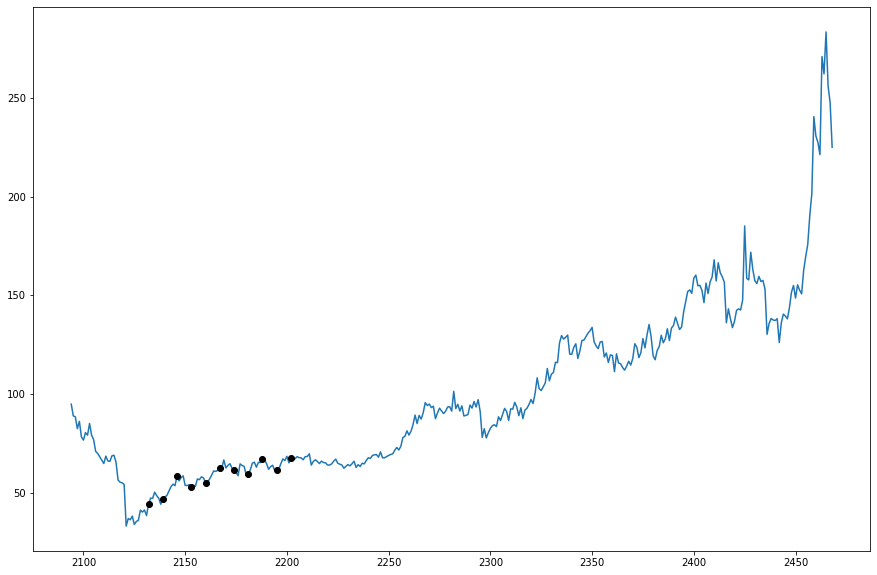

In [ ]:
fig= plt.figure(figsize=[15,10])
plt.plot(data_mon['Close'])
plt.plot(b,a,'ko')